In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

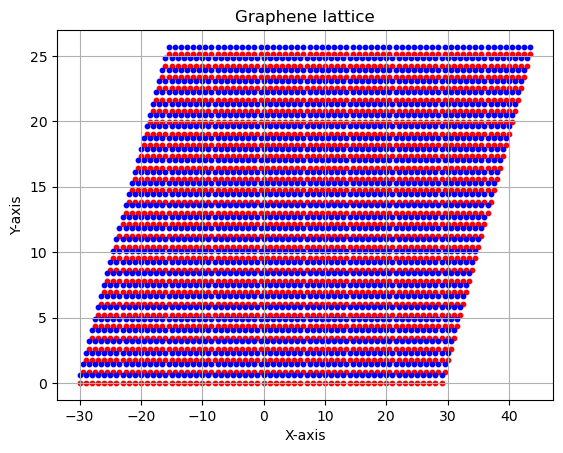

In [2]:
# Defining the Base lattice  - (TRIANGULAR LATICE)
# lattice translation vectors
A1 = [1, 0]
A2 = [1/2, np.sqrt(3)/2]
# number of points along each direction vectors
n = 30
# Lattice generation and visualization
subL1_x = []
subL1_y = []
subL2_x = []
subL2_y = []
for i in range(-n, n):
    for j in range(0, n):
        subL1_x.append((A1[0] * i) + (A2[0] * j))
        subL1_y.append((A1[1] * i) + (A2[1] * j))
        subL2_x.append((A1[0] * i) + (A2[0] * j))
        subL2_y.append((A1[1] * i) + (A2[1] * j) + (1/np.sqrt(3)))
#print(triX_x)
#print(triX_y)
# Plot the points
g = plt.figure();
plt.scatter(subL1_x, subL1_y, color='red', s=10)
plt.scatter(subL2_x, subL2_y, color='blue', s=10)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graphene lattice')
plt.grid(True)
plt.show()

29
29


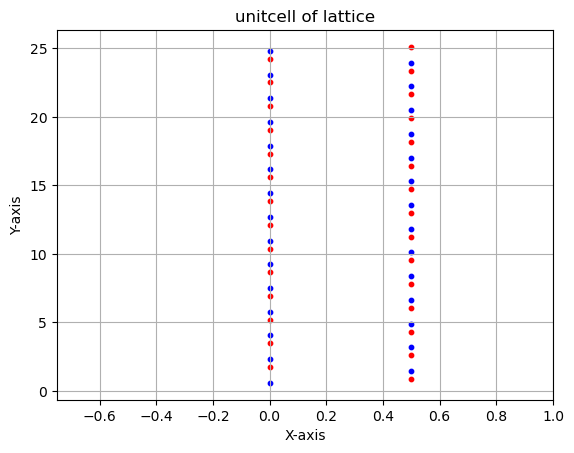

In [3]:
# Isolating a unit cell from graphene nanoribbon
unitcell1_x = []
unitcell1_y = []
unitcell2_x = []
unitcell2_y = []
# Bounds of unit cell
Ylow = (1/4) *  np.sqrt(3)/2 
Yhigh = (n - (1/2)) *  np.sqrt(3)/2 
Xlow = -1/4
Xhigh = 3/4
for i in range(len(subL1_x)):
    [x1, y1] = [subL1_x[i], subL1_y[i]]
    [x2, y2] = [subL2_x[i], subL2_y[i]]
    if x1 > Xlow and x1 < Xhigh and y1 > Ylow and y1 < Yhigh:
        unitcell1_x.append(x1)  
        unitcell1_y.append(y1)
    if x2 > Xlow and x2 < Xhigh and y2 > Ylow and y2 < Yhigh:
        unitcell2_x.append(x2)  
        unitcell2_y.append(y2)

print(len(unitcell1_x))
print(len(unitcell2_y))

g = plt.figure()
plt.scatter(unitcell1_x, unitcell1_y, color='red', s=10)
plt.scatter(unitcell2_x, unitcell2_y, color='blue', s=10)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('unitcell of lattice')
plt.grid(True)
plt.xlim(-0.75, 1)
plt.show()

In [202]:
# Translation vector
Tx = [1, 0]
# neighbour table formation
L1D1 = [-1/2, -1/(2*np.sqrt(3))]
L1D2 = [0, 1/np.sqrt(3)]
L1D3 = [1/2, -1/(2*np.sqrt(3))]
L2D1 = [-1/2, 1/(2*np.sqrt(3))]
L2D2 = [1/2, 1/(2*np.sqrt(3))]
L2D3 = [0, -1/np.sqrt(3)]

L1NN1 = []
L1NN2 = []
L1NN3 = []
L2NN1 = []
L2NN2 = []
L2NN3 = []

def neig_L1_1(i, j):
    [x, y] = np.round([unitcell1_x[i], unitcell1_y[i]], 6)
    [x1, y1] = np.round([unitcell2_x[j], unitcell2_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L1D1[0] , y + L1D1[1]], 6)):
        L1NN1.append(j)
    elif np.allclose([x1, y1], np.round([x + L1D1[0] + Tx[0], y + L1D1[1] + Tx[1]], 6)):
        L1NN1.append(j)
    return 

def neig_L1_2(i, j):
    [x, y] = np.round([unitcell1_x[i], unitcell1_y[i]], 6)
    [x1, y1] = np.round([unitcell2_x[j], unitcell2_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L1D2[0] , y + L1D2[1] - ((n-1) * np.sqrt(3)/2)], 6)):
        L1NN2.append(None)
    elif np.allclose([x1, y1], np.round([x + L1D2[0] - 1/2, y + L1D2[1] - ((n-1) * np.sqrt(3)/2)], 6)):
        L1NN2.append(None)
    elif np.allclose([x1, y1], np.round([x + L1D2[0] , y + L1D2[1]], 6)):
        L1NN2.append(j)
    return 

def neig_L1_3(i, j):
    [x, y] = np.round([unitcell1_x[i], unitcell1_y[i]], 6)
    [x1, y1] = np.round([unitcell2_x[j], unitcell2_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L1D3[0] , y + L1D3[1]], 6)):
        L1NN3.append(j)
    elif np.allclose([x1, y1], np.round([x + L1D3[0] - Tx[0], y + L1D3[1] - Tx[1]], 6)):
        L1NN3.append(j)
    return 

def neig_L2_1(i, j):
    [x, y] = np.round([unitcell2_x[i], unitcell2_y[i]], 6)
    [x1, y1] = np.round([unitcell1_x[j], unitcell1_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L2D1[0] , y + L2D1[1]], 6)):
        L2NN1.append(j)
    elif np.allclose([x1, y1], np.round([x + L2D1[0] + Tx[0], y + L2D1[1] + Tx[1]], 6)):
        L2NN1.append(j)
    return 

def neig_L2_2(i, j):
    [x, y] = np.round([unitcell2_x[i], unitcell2_y[i]], 6)
    [x1, y1] = np.round([unitcell1_x[j], unitcell1_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L2D2[0] , y + L2D2[1]], 6)):
        L2NN2.append(j)
    elif np.allclose([x1, y1], np.round([x + L2D2[0] - Tx[0], y + L2D2[1] - Tx[1]], 6)):
        L2NN2.append(j)
    return 

def neig_L2_3(i, j):
    [x, y] = np.round([unitcell2_x[i], unitcell2_y[i]], 6)
    [x1, y1] = np.round([unitcell1_x[j], unitcell1_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L2D3[0] , y + L2D3[1] + ((n-1) * np.sqrt(3)/2)], 6)):
        L2NN3.append(None)
    elif np.allclose([x1, y1], np.round([x + L2D3[0] + 1/2, y + L2D3[1] + ((n-1) * np.sqrt(3)/2)], 6)):
        L2NN3.append(None)
    elif np.allclose([x1, y1], np.round([x + L2D3[0] , y + L2D3[1]], 6)):
        L2NN3.append(j)
    return 

for i in range(len(unitcell1_x)):
    for j in range(len(unitcell2_x)):
        neig_L1_1(i, j)
        neig_L1_2(i, j)
        neig_L1_3(i, j)
        neig_L2_1(i, j)
        neig_L2_2(i, j)
        neig_L2_3(i, j)
        
print(L1NN1)
print(L1NN2)
print(L1NN3)
print(L2NN1)
print(L2NN2)
print(L2NN3)

[2, 0, 4, 1, 6, 3, 8, 5, 10, 7, 12, 9, 14, 11, 16, 13, 18, 15, 20, 17, 22, 19, 24, 21, 26, 23, 28, 25, 27]
[0, None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28]
[2, 0, 4, 1, 6, 3, 8, 5, 10, 7, 12, 9, 14, 11, 16, 13, 18, 15, 20, 17, 22, 19, 24, 21, 26, 23, 28, 25, 27]
[1, 3, 0, 5, 2, 7, 4, 9, 6, 11, 8, 13, 10, 15, 12, 17, 14, 19, 16, 21, 18, 23, 20, 25, 22, 27, 24, 28, 26]
[1, 3, 0, 5, 2, 7, 4, 9, 6, 11, 8, 13, 10, 15, 12, 17, 14, 19, 16, 21, 18, 23, 20, 25, 22, 27, 24, 28, 26]
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, None, 28]


In [203]:
# Hamiltonian definition
t = 1
def H(kx):
    sub = len(unitcell1_x)
    k = [kx, 0]
    Hij = np.zeros((2*sub, 2*sub), dtype=np.complex128)
    for i in range(0,len(unitcell1_x)):
        n1, n3, n4, n5 = int(L1NN1[i]), int(L1NN3[i]), int(L2NN1[i]), int(L2NN2[i])
        Hij[i][n1 + sub] += t * np.exp(1j * np.dot(k, L1D1))
        Hij[i][n3 + sub] += t * np.exp(1j * np.dot(k, L1D3))
        Hij[i + sub][n4] += t * np.exp(1j * np.dot(k, L2D1))
        Hij[i + sub][n5] += t * np.exp(1j * np.dot(k, L2D2))
        
        if L1NN2[i] is not None:
            n2 = int(L1NN2[i])
            Hij[i][n2 + sub] += t * np.exp(1j * np.dot(k, L1D2))
        if L2NN3[i] is not None:
            n6 = int(L2NN3[i])
            Hij[i + sub][n6] += t * np.exp(1j * np.dot(k, L2D3))
    return Hij 

In [204]:
BZ = np.linspace(0, 2 * np.pi, 100)

band = np.zeros((2 * len(unitcell1_x), len(BZ)))
for i in tqdm(range(0, len(BZ))):
    eigen = np.linalg.eigvalsh(H(BZ[i]))
    for b_index in range(0, 2 * len(unitcell1_x)):
        band[b_index][i] = eigen[b_index]

100%|██████████| 100/100 [00:00<00:00, 641.89it/s]


(0.0, 6.283185307179586)

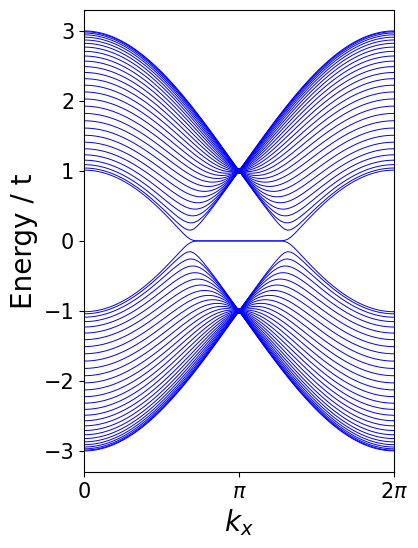

In [209]:
f = plt.figure(figsize=(4,6));   
for b_index in range(0, 2 * len(unitcell1_x)):
    plt.plot( BZ, band[b_index], c = 'blue', linestyle='-', linewidth = 0.7 )
plt.xlabel("$k_x$", fontsize=20);plt.axis('tight')
plt.ylabel("Energy / t", fontsize=20)
# Customize x-axis ticks with Greek symbols
plt.yticks(fontsize = 15)
plt.xticks( [0, BZ[-1]/2, BZ[-1]],[ 0, r'$\pi$',  r'$2 \pi$'],fontsize=15)
plt.xlim(BZ[0], BZ[-1])
#plt.ylim(-0.6, 0.6)